# Энтропия Реньи

[Paper](http://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=5508633)

[еще одна штука](http://multifractal.narod.ru/7multi/7multi.htm)

[wiki](https://vk.com/away.php?utf=1&to=https%3A%2F%2Fru.wikipedia.org%2Fwiki%2F%25D0%25AD%25D0%25BD%25D1%2582%25D1%2580%25D0%25BE%25D0%25BF%25D0%25B8%25D1%258F_%25D0%25A0%25D0%25B5%25D0%25BD%25D1%258C%25D0%25B8)

$p_i(\epsilon)$ -- сумма интенсивностей пикселей / интенсивность всей картинки

$$q \in (-\inf, \inf)$$

обобщенная стат сумма

$$\sum_{i=1}^n$$

$$H(q, \epsilon) = \frac{1}{1-q}ln(\sum p_i^q(\epsilon))$$

$q$ -- любое значение от 0 до 1

$\epsilon$ -- размер окна



$$D_q = - \frac{H(q, \epsilon)}{ln(\epsilon)}$$

Надо взять несколько q и для них проитерировать по $\epsilon$

In [57]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
from scipy.ndimage.filters import convolve
from scipy.stats import linregress

In [10]:
im = Image.open(BytesIO(requests.get('https://i0.wallpaperscraft.ru/image/'
                            'derevo_poverkhnost_tekstura_vlazhnyj_119316_300x188.jpg').content))

In [34]:
im = Image.open('../data/silver/large.jpg')

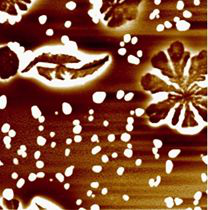

In [35]:
im

In [15]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [1/3, 1/3, 1/3])

In [36]:
immat = rgb2gray(np.array(im))

In [37]:
q = [-3, -2, 1, 2, 5, 10, 20]
ws = range(1, 20)

In [61]:
def reni_entropy(p, q):
    return (1 / (1 - q) *
            np.log(np.sum(np.power(p, q))))

In [62]:
ns = []

In [63]:
for w in ws:
    ns.append(reni_entropy(convolve(immat, np.ones((w, w)), mode='constant')[::w, ::w] / np.mean(immat), 10))

In [64]:
x = -np.log(ws)
y = ns

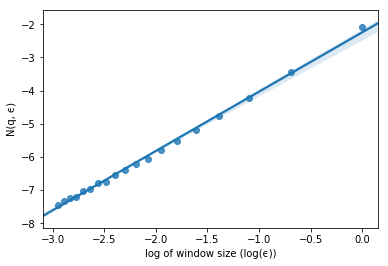

In [65]:
sns.regplot(x=pd.Series(x, name='log of window size (log(ϵ))'), 
            y=pd.Series(y, name='N(q, ϵ)'))

In [66]:
linregress(x, y)

LinregressResult(slope=1.7882288588293935, intercept=-2.24220231655855, rvalue=0.9987914571345649, pvalue=1.0878112657407838e-23, stderr=0.02134217080415996)